# Start Here

This is a basic Tidy3D script showing the FDTD simulation of a delectric cube in the presence of a point dipole.

In [1]:
# import the package and the web API
import tidy3d as td
import tidy3d.web as web

Using Tidy3D credentials from stored file


In [2]:
# set up parameters of simulation (length scales are micrometers)
grid_size = 0.01
pml = td.PML()
sim_size = (4, 4, 4)
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 10.0
run_time = 12.0 / fwidth

# create structure
dielectric = td.Medium.from_nk(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=(0, 0, 0), size=(1.5, 1.5, 1.5)),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ey')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Ey', 'Hz'],
    center=(0, 0, 0),
    size=(td.inf, td.inf, 0),
    freqs=[freq0],
    name='fields_on_plane')

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(grid_size, grid_size, grid_size),
                    structures=[square],
                    sources=[source],
                    monitors=[monitor],
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [3]:
# run the simulation, download the data.
data = web.run(sim, task_name='quickstart', path='data/data.hdf5')

[09:01:34] INFO     Uploaded task 'quickstart' with task_id                     ]8;id=980006;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=924316;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#108\108]8;;\
                    '9e1fc2ce-d202-46b5-8e85-21f9fbe13e58'.

Output()

[09:01:50] status = preprocess                                                  ]8;id=738711;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=187337;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:02:14] status = running                                                     ]8;id=585831;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=613568;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:04:23] status = postprocess                                                 ]8;id=197315;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=697432;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:05:54] status = success                                                     ]8;id=11628;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=840834;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#200\200]8;;\

[09:05:54] INFO     downloading file "monitor_data.hdf5" to "data/data.hdf5"    ]8;id=661444;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=205706;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#479\479]8;;\

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[09:05:58] INFO     loading SimulationData from data/data.hdf5                  ]8;id=920076;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=815289;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#300\300]8;;\

In [4]:
# see the log
print(data.log)

Simulation domain Nx, Ny, Nz: [424, 424, 424]
Applied symmetries: (0, 0, 0)
Number of computational grid points: 7.6225e+07.
Using subpixel averaging: True
Number of time steps: 2.3096e+04
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17
Compute source modes time (s):     0.1620
Compute monitor modes time (s):    0.1625

Rest of setup time (s):            0.1360

Starting solver...
- Time step    923 / time 1.60e-14s (  4 % done), field decay: 1.00e+00
- Time step   1531 / time 2.65e-14s (  6 % done), field decay: 1.00e+00
- Time step   1847 / time 3.20e-14s (  8 % done), field decay: 9.11e-01
- Time step   2771 / time 4.80e-14s ( 12 % done), field decay: 1.27e-01
- Time step   3695 / time 6.40e-14s ( 16 % done), field decay: 2.84e-02
- Time step   4619 / time 8.01e-14s ( 20 % done), field decay: 1.24e-02
- Time step   5543 / time 9.61e-14s ( 24 % done), field decay: 6.35e-03
- Time step   6466 / time 1.12e-13s ( 28 % done), field decay: 2.98e-03
- Time step   7390 / time 1

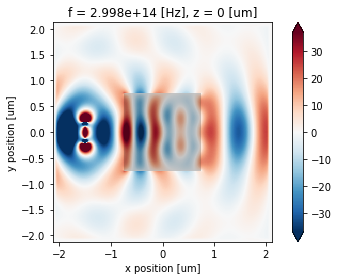

In [6]:
# plot the fields stored in the monitor
ax = data.plot_field('fields_on_plane', 'Ey', freq=freq0, z=0)